In [2]:
import pandas as pd

# =======================
# 1. Load cleaned datasets
train_df = pd.read_csv("../Data/processed/cleaning_train.csv")
eval_df = pd.read_csv("../Data/processed/cleaning_eval.csv")
holdout_df = pd.read_csv("../Data/processed/cleaning_holdout.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Print the minimum and maximum of the date
print("Train data range: ", train_df["date"].min(), train_df["date"].max())
print("Eval data range: ", eval_df["date"].min(), eval_df["date"].max())
print("Holdout data range: ", holdout_df["date"].min(), holdout_df["date"].max())

train_df["date"] = pd.to_datetime(train_df["date"])
eval_df["date"] = pd.to_datetime(eval_df["date"])
holdout_df["date"] = pd.to_datetime(holdout_df["date"])

Train data range:  2012-03-31 2019-12-31
Eval data range:  2020-01-31 2021-12-31
Holdout data range:  2022-01-31 2023-12-31


In [3]:
train_df.head(2)

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,0.943662,0.142857,0.043478,ATL,30002,2012,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Roswell,33.7338,-84.3922
1,2012-03-31,200000.0,7500.0,104.931794,79.265873,1.0,1.0,1.0,2.0,290.0,0.909091,0.000000,0.000000,PGH,15469,2012,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2441.0,41.8,20241.0,2385.0,1108.0,641.0,94600.0,1171.0,52.0,2376.0,2376.0,1018.0,105863.681174,Pittsburgh,40.4744,-79.8632


In [10]:
# =======================
# 2. Date Features
# =======================
def add_date_feature(df):
    # Ensure 'date' is datetime
    df['date'] = pd.to_datetime(df['date'])

    # Extract features
    df["year"] = df["date"].dt.year
    df["quarter"] = df["date"].dt.quarter
    df["month"] = df["date"].dt.month

    # Reorder columns (optional)
    df.insert(1, "year", df.pop("year"))
    df.insert(2, "quarter", df.pop("quarter"))
    df.insert(3, "month", df.pop("month"))

    return df

In [11]:
train_df = add_date_feature(train_df)
eval_df = add_date_feature(eval_df)
holdout_df = add_date_feature(holdout_df)

In [12]:
print(train_df.shape)
train_df.head(2)

(576815, 43)


,date,year,quarter,month,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2012-03-31,2012,1,3,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,0.943662,0.142857,0.043478,ATL,30002,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Roswell,33.7338,-84.3922
1,2012-03-31,2012,1,3,200000.0,7500.0,104.931794,79.265873,1.0,1.0,1.0,2.0,290.0,0.909091,0.000000,0.000000,PGH,15469,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2441.0,41.8,20241.0,2385.0,1108.0,641.0,94600.0,1171.0,52.0,2376.0,2376.0,1018.0,105863.681174,Pittsburgh,40.4744,-79.8632


In [13]:
print(eval_df.shape)
eval_df.head(2)

(148448, 43)


,date,year,quarter,month,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2020-01-31,2020,1,1,184000.0,168450.0,123.333333,109.899800,35.0,30.0,34.0,37.0,50.0,0.954732,0.171429,0.300000,CHI,60482,3.0,0.0,2.0,0.0,68.0,30.0,60.0,5.0,14.0,10849.0,42.1,27037.0,10795.0,4598.0,964.0,169000.0,5690.0,414.0,10573.0,10573.0,5089.0,164839.734849,Chicago-Naperville-Elgin,41.6675,-87.9597
1,2020-01-31,2020,1,1,140000.0,139000.0,94.691957,111.311054,61.0,81.0,83.0,54.0,10.0,0.963039,0.098361,0.469136,CIN,41071,35.0,5.0,4.0,3.0,139.0,259.0,86.0,1.0,8.0,20624.0,36.6,30324.0,19423.0,10164.0,802.0,132400.0,10479.0,552.0,19809.0,19809.0,9383.0,132164.314962,Cincinnati,39.0811,-84.4646


In [14]:
print(holdout_df.shape)
holdout_df.head(2)

(148943, 43)


,date,year,quarter,month,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2022-01-31,2022,1,1,340000.0,349999.0,189.867865,195.526649,282.0,287.0,241.0,73.0,12.0,0.991177,0.308511,0.634146,ORL,32771,9.0,0.0,1.0,1.0,56.0,64.0,18.0,4.0,9.0,57074.0,37.7,33896.0,56681.0,22246.0,1289.0,261800.0,29485.0,1469.0,55621.0,55621.0,24381.0,314667.746005,Orlando-Kissimmee-Sanford,28.4343,-81.363
1,2022-01-31,2022,1,1,310000.0,269900.0,243.839836,239.543726,49.0,47.0,43.0,7.0,6.5,1.006586,0.489796,0.723404,TPA,33778,21.0,0.0,3.0,2.0,35.0,57.0,32.0,0.0,22.0,15912.0,47.8,31277.0,15405.0,7865.0,1161.0,206600.0,7846.0,345.0,15423.0,15423.0,6733.0,325271.243813,Tampa-St. Petersburg-Clearwater,28.1538,-82.405




The key rule:

   * Fit encoders/transformers on train only

   * Apply the learned mappings to eval

Why this matters

   * If we had fit the encoders/scalers on both train + eval together:

   * Eval would leak information into training.

   * Our metrics would look artificially good, because the model would unknowingly benefit from seeing the future.

By strictly fitting on train and applying to eval:

   * Eval stays a true proxy for unseen future data.

   * The performance you see is realistic for when you deploy the model in the wild.



In [18]:
# =======================
# 3. Frequency Encoding (zipcode)
# =======================
zip_counts = train_df["zipcode"].value_counts()

train_df["zipcode_freq"] = train_df["zipcode"].map(zip_counts)
eval_df["zipcode_freq"] = eval_df["zipcode"].map(zip_counts).fillna(0)
holdout_df["zipcode_freq"] = holdout_df["zipcode"].map(zip_counts).fillna(0)

print("Zip freq example (train):")
print(train_df[["zipcode","zipcode_freq"]].head())

Zip freq example (train):
   zipcode  zipcode_freq
0    30002            94
1    15469            86
2    15464            85
3     2739            94
4    15461            94


In [19]:
train_df["city_full"].value_counts()

city_full
New York-Newark-Jersey City              77489
Chicago-Naperville-Elgin                 35089
Los Angeles-Long Beach-Anaheim           33784
Philadelphia-Camden-Wilmington           31116
Washington-Arlington-Alexandria          29007
Boston-Cambridge-Newton                  25527
Pittsburgh                               25436
Dallas-Fort Worth-Arlington              23585
Minneapolis-St. Paul-Bloomington         20344
Houston-Pasadena-The Woodlands           20138
Detroit-Warren-Dearborn                  19827
Atlanta-Sandy Springs-Roswell            19009
St. Louis                                18540
Miami-Fort Lauderdale-West Palm Beach    16962
San Francisco-Oakland-Fremont            15553
Seattle-Tacoma-Bellevue                  14588
Phoenix-Mesa-Chandler                    13912
Cincinnati                               13740
Riverside-San Bernardino-Ontario         13705
Baltimore-Columbia-Towson                13578
Tampa-St. Petersburg-Clearwater          12074
Den

In [21]:
# ======================
# 4. Target Encoding (city_full)
# ======================
from category_encoders import TargetEncoder
te = TargetEncoder(cols=["city_full"])
train_df["city_encoded"] = te.fit_transform(train_df["city_full"] , train_df["price"])
eval_df["city_encoded"] = te.transform(eval_df["city_full"])
holdout_df["city_encoded"] = te.transform(holdout_df["city_full"])

'''
🔍 Nuance:

- On train, we call fit_transform() → this computes the mapping from city → avg price using training targets.
- On eval, we only call transform() → it applies the train mapping. It never looks at eval’s price column.
'''


'\n🔍 Nuance:\n\n- On train, we call fit_transform() → this computes the mapping from city → avg price using training targets.\n- On eval, we only call transform() → it applies the train mapping. It never looks at eval’s price column.\n'

In [24]:
# =======================
# 5. Drop unused columns
# =======================
# Drop leakage column "median_sale_price"
drop_cols = ["zipcode", "date", "city", "city_full", "median_sale_price"]
train_df.drop(columns=drop_cols,inplace=True)
eval_df.drop(columns=drop_cols,inplace=True)
holdout_df.drop(columns=drop_cols,inplace=True)

In [25]:
print(train_df.shape)
train_df.head(2)

(576815, 40)


,year,quarter,month,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,lat,lng,zipcode_freq,city_encoded
0,2012,1,3,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,0.943662,0.142857,0.043478,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,33.7338,-84.3922,94,192627.058387
1,2012,1,3,7500.0,104.931794,79.265873,1.0,1.0,1.0,2.0,290.0,0.909091,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2441.0,41.8,20241.0,2385.0,1108.0,641.0,94600.0,1171.0,52.0,2376.0,2376.0,1018.0,105863.681174,40.4744,-79.8632,86,131828.753854


In [26]:
print(eval_df.shape)
eval_df.head(2)

(148448, 40)


,year,quarter,month,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,lat,lng,zipcode_freq,city_encoded
0,2020,1,1,168450.0,123.333333,109.899800,35.0,30.0,34.0,37.0,50.0,0.954732,0.171429,0.300000,3.0,0.0,2.0,0.0,68.0,30.0,60.0,5.0,14.0,10849.0,42.1,27037.0,10795.0,4598.0,964.0,169000.0,5690.0,414.0,10573.0,10573.0,5089.0,164839.734849,41.6675,-87.9597,94.0,221986.823469
1,2020,1,1,139000.0,94.691957,111.311054,61.0,81.0,83.0,54.0,10.0,0.963039,0.098361,0.469136,35.0,5.0,4.0,3.0,139.0,259.0,86.0,1.0,8.0,20624.0,36.6,30324.0,19423.0,10164.0,802.0,132400.0,10479.0,552.0,19809.0,19809.0,9383.0,132164.314962,39.0811,-84.4646,94.0,150644.162953


In [27]:
# =========================
# 6. Save feature engineered datasets
# =========================
train_df.to_csv("../Data/processed/feature_engineered_train.csv", index=False)
eval_df.to_csv("../Data/processed/feature_engineered_eval.csv", index=False)
holdout_df.to_csv("../Data/processed/feature_engineered_holdout.csv", index=False)

print("Feature Engineering Complete.")
print("Train shape:", train_df.shape)
print("Eval shape:", eval_df.shape)
print("Holdout shape:", holdout_df.shape)

Feature Engineering Complete.
Train shape: (576815, 40)
Eval shape: (148448, 40)
Holdout shape: (148943, 40)


* Summery
    * Fit frequency encoding on train only, apply to eval (with fillna(0) in case eval has unseen zipcodes).

    * Fit target encoding on train only, apply to eval with the same mapping.

    * Added a helper add_date_features so date feature logic isn’t duplicated.

    * Dropped unused columns consistently from both datasets

    * Dropped high correlated column "median_sale_price"

    * Saved Three separate outputs:
        * feature_engineered_train.csv
        * feature_engineered_eval.csv
        * feature_engineered_holdout.csv

✅ So the nuance is:

   * Train → fit transformations (learn rules from the past).

   * Eval → transform with those rules (apply them to future data).

   * Never re-fit on eval. That’s what keeps eval “unseen” and leakage-free.



## Multicollinearity

to look at multicollinearity we can use:

   * VIF -> Variance Inflation Factor (VIF)
      * Rule of thumb: VIF > 5 (or 10) → high multicollinearity
   * Correlation matrix
      * High correlation (>0.8 or <-0.8) indicates potential multicollinearity.



In [28]:
df = train_df

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(df, target_col=None):
    """
    Calculate Variance Inflation Factor (VIF) for each numeric column in df.
    """
    # Select the numeric olny
    numeric_df = df.select_dtypes(include=["float64", "int64"]).copy()

    # Drop target if provided
    if target_col and target_col in numeric_df.columns:
        numeric_df = numeric_df.drop(columns=[target_col])

    # Add constant for statsmodels
    X = add_constant(numeric_df)

    # Compute VIF (skip the first column = constant)
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_df.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i + 1)  # skip constant at index 0
        for i in range(len(numeric_df.columns))
    ]

    return vif_data.sort_values("VIF", ascending=False).reset_index(drop=True)


In [31]:
df = pd.read_csv("../Data/raw/train.csv")
vit_table = calculate_vif(df)
print(vit_table)

C:\Users\Ahmed Sherif\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                         feature          VIF
0    Total School Age Population          inf
1        Total School Enrollment          inf
2               Total Population  6628.151872
3              Total Labor Force   840.056652
4            Median Commute Time   650.593876
5   Total Families Below Poverty   574.562558
6            Total Housing Units    21.300795
7                   new_listings    19.931619
8                     homes_sold    13.410432
9          Unemployed Population    12.881727
10                    restaurant    10.915352
11                          bank    10.702990
12                         price     9.660762
13                   supermarket     9.631659
14                 pending_sales     9.243447
15             Median Home Value     8.309086
16             median_sale_price     6.573961
17                     inventory     5.887844
18                          park     5.681466
19                        school     5.667255
20                       station  



How to interpret

   * IF > 10 → serious multicollinearity.

   * VIF > 100 → catastrophic (drop/re-engineer immediately).

   * VIF = ∞ → perfect linear redundancy (drop one).



In [32]:
offenders = ["Total Population", "Total Labor Force", "Total Families Below Poverty"]
corr_matrix = df[offenders].corr()
corr_matrix

,Total Population,Total Labor Force,Total Families Below Poverty
Total Population,1.000000,0.985715,0.998992
Total Labor Force,0.985715,1.000000,0.985703
Total Families Below Poverty,0.998992,0.985703,1.000000


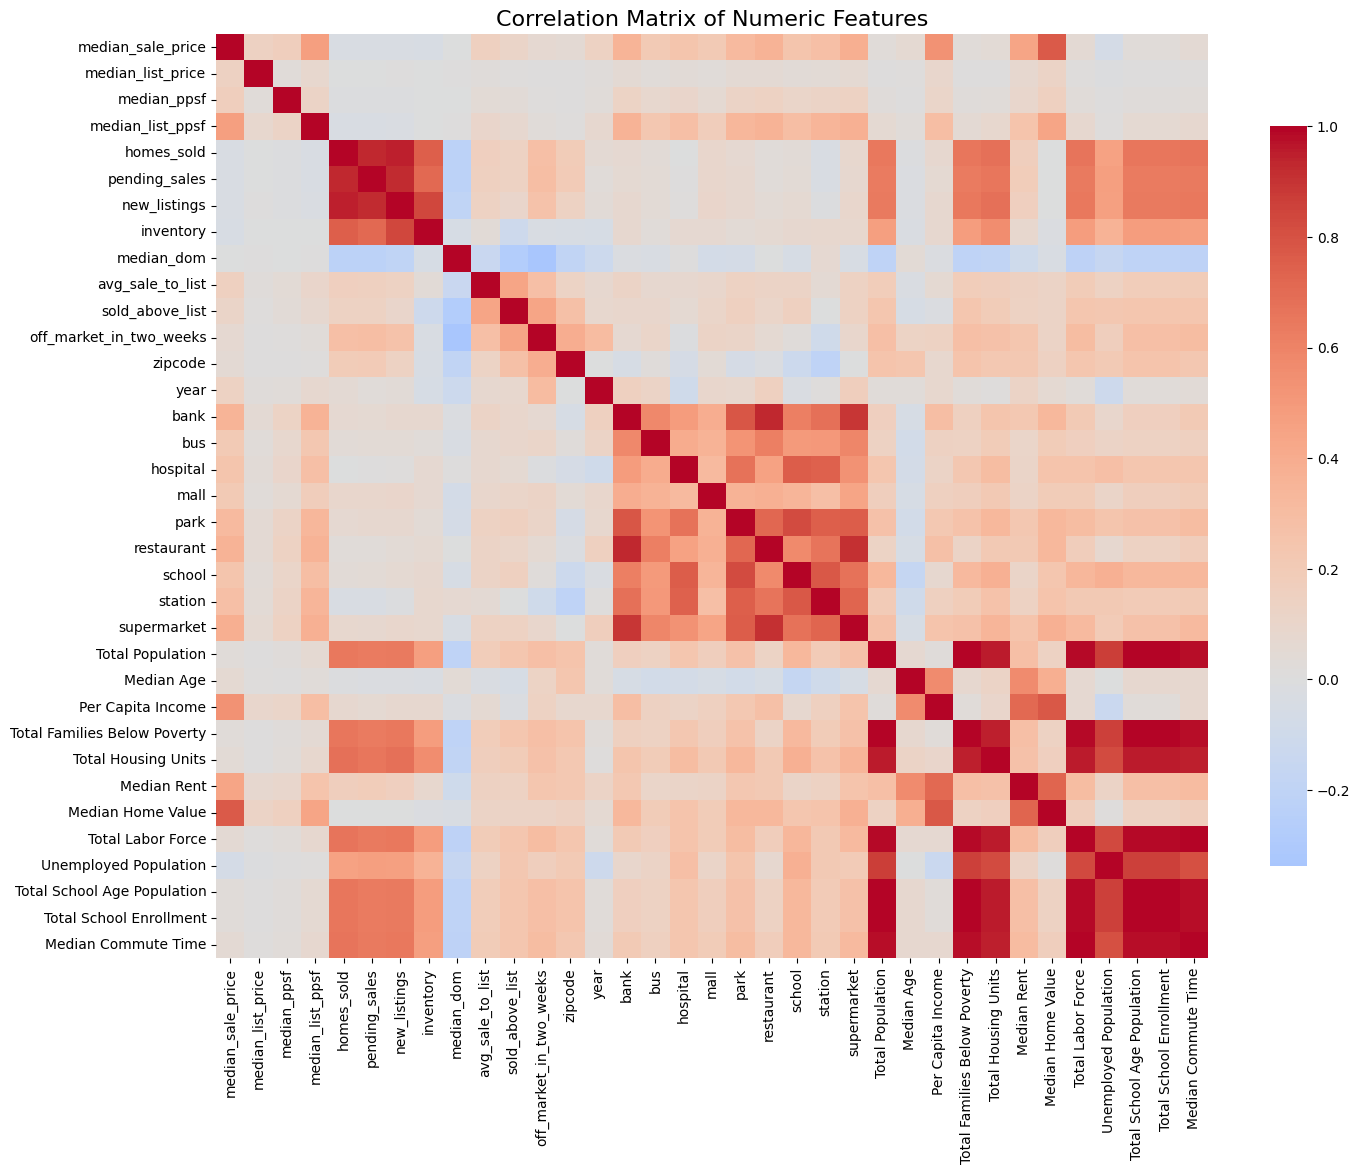

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features (exclude the target 'price')
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=["price"], errors="ignore")

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display full matrix as heatmap
plt.figure(figsize=(16,12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=False,   # set to True if you want numbers on cells
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()

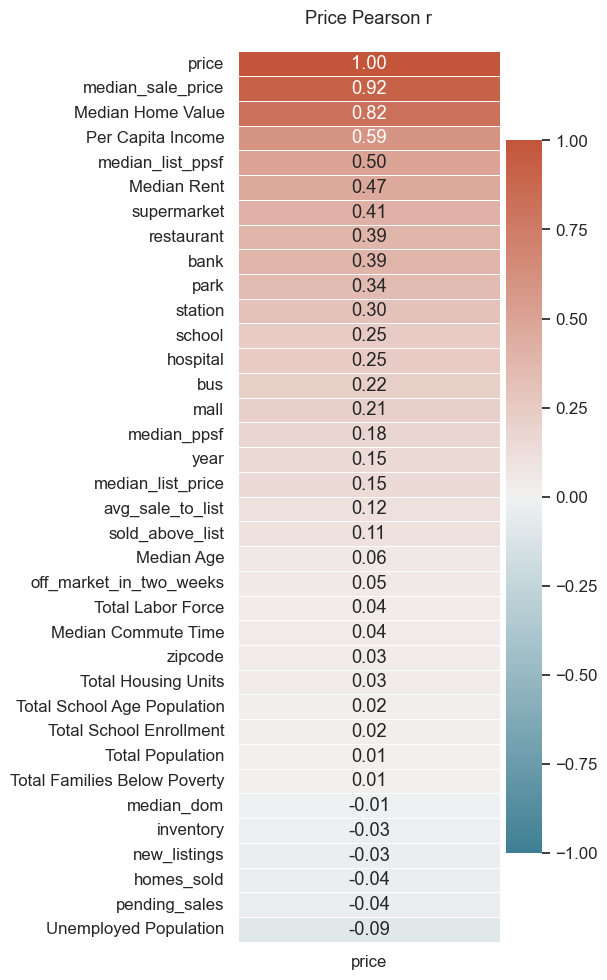

In [34]:
# Compute correlations with price
num_cols = df.select_dtypes("number").columns
corr_vec  = df[num_cols].corr(method="pearson")["price"].sort_values(ascending=False)
sns.set_theme(style="white")
sns.set(font_scale=1.1)
plt.figure(figsize=(6,10))
ax = sns.heatmap(
        corr_vec.to_frame(),
        annot=True, fmt=".2f",
        vmin=-1, vmax=1,
        cmap=sns.diverging_palette(220, 20, as_cmap=True),
        center=0,
        linewidths=.5, linecolor="white",
        cbar_kws={"shrink":0.8, "pad":0.02}
     )
ax.set_title("Price Pearson r", pad=20)
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()
plt.show()